
# Goal Project :
    "Melakukan prediksi apakah suatu pinjaman yang diajukan oleh user akan disetujui ataukah tidak"

## Objectif :
    - Melakukan data understanding
    - Membuat model yang dapat memprediksi apakah user yang mengajukan pinjaman akan disetujui atau tidak
    -

# Import Data

In [2]:
import pandas as pd, numpy as np


In [3]:
pd.set_option("display.max_columns", None) #Mengubah settingan default agar kolom terlihat semua tanpa ada ter skip '...'

In [4]:
df = pd.read_csv('dataset/loan_data_2007_2014.csv')
df.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21224\3291660668.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset/loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [6]:
#df.isna().sum()

In [7]:
pd.set_option("display.max_rows", None)

In [8]:
#df.isna().sum()

In [9]:
100.00 * (df.isnull().sum() / df.shape[0]), 

(Unnamed: 0                       0.000000
 id                               0.000000
 member_id                        0.000000
 loan_amnt                        0.000000
 funded_amnt                      0.000000
 funded_amnt_inv                  0.000000
 term                             0.000000
 int_rate                         0.000000
 installment                      0.000000
 grade                            0.000000
 sub_grade                        0.000000
 emp_title                        5.916553
 emp_length                       4.505399
 home_ownership                   0.000000
 annual_inc                       0.000858
 verification_status              0.000000
 issue_d                          0.000000
 loan_status                      0.000000
 pymnt_plan                       0.000000
 url                              0.000000
 desc                            72.981546
 purpose                          0.000000
 title                            0.004289
 zip_code  

# Handling Missing Value

In [10]:
#Data yang mengandung missing value diatas 40% akan di drop 
above50 = ['desc','mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint','verification_status_joint', 'open_acc_6m','open_il_6m','open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m','open_rv_24m' ,'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

In [11]:
df.drop((above50), axis=1, inplace=True)

In [12]:
#100.00 * (df.isnull().sum() / df.shape[0]), 

In [13]:
miss_df = ['emp_title', 'emp_length', 'annual_inc','title', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim' ]

In [14]:
#Data Categoric handle by fillna mode()
#Data Numerik handle by fillna median

In [15]:
#Memisahkan missing value apakah kategorik ataukah numerik
cat_miss = ['emp_title', 'emp_length', 'title', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
num_miss = ['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq','tot_coll_amt','tot_cur_bal','total_rev_hi_lim'] 

In [16]:
nums = df.select_dtypes(include=np.number).columns #data numerik berdasar kolom
cats = df.select_dtypes(exclude=np.number).columns #data categorik berdasar kolom

In [17]:
#Handling data categorik by mode
for i in cat_miss:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [18]:
#Handling data numerik by median
for j in num_miss:
    df[j].fillna(df[j].median(), inplace=True)

In [19]:
print('Missing Data df setelah handling \n\n',100.00 * (df.isnull().sum() / df.shape[0]))

Missing Data df setelah handling 

 Unnamed: 0                    0.0
id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     0.0
emp_length                    0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc    

In [20]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.0,466285.000000,4.662850e+05,4.662850e+05,4.662850e+05
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327729e+04,17.218758,0.284661,0.804695,11.186995,0.160554,1.623020e+04,56.177985,25.064302,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009082,1.0,0.004002,1.629893e+02,1.301714e+05,2.923681e+04
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496334e+04,7.851121,0.797343,1.091583,4.987380,0.510848,2.067625e+04,23.724005,11.599792,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108632,0.0,0.068635,1.348289e+04,1.416729e+05,3.443264e+04
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,1.0,0.000000,0.000000e+00,3.361100e+04,1.500000e+04
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,1.0,0.000000,0.000000e+00,8.153900e+04,2.280000e+04
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.895300e+04,22.780000,0.000000,1.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,1.0,0.000000,0.000000e+00,1.849300e+05,3.430000e+04
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,33.000000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,32160.380000,32160.380000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36234.440000,20.000000,1.0,5.000000,9.152545e+06,8.000078e+06,9.999999e+06


In [21]:
df.describe(exclude=np.number)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285
unique,2,7,35,205475,11,6,3,91,9,2,466285,14,63099,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,337953,136929,31686,32987,171057,235875,168055,38782,224226,466276,1,274195,164095,5304,71450,3703,303005,179996,435607,327741,466285


In [22]:
df.describe(exclude=np.number).loc['unique', :]

term                        2
grade                       7
sub_grade                  35
emp_title              205475
emp_length                 11
home_ownership              6
verification_status         3
issue_d                    91
loan_status                 9
pymnt_plan                  2
url                    466285
purpose                    14
title                   63099
zip_code                  888
addr_state                 50
earliest_cr_line          664
initial_list_status         2
last_pymnt_d               98
next_pymnt_d              100
last_credit_pull_d        103
application_type            1
Name: unique, dtype: object

In [23]:
df.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [24]:
#Memilih fitur yang diperkirakan tidak akan mempengaruhi model prediksi

# EDA

## Univariate Analysis

In [25]:
#Univariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns
#features = nums
#plt.figure(figsize=(15, 15))
#for i in range(0, len(nums)):
#    plt.subplot(7, 5, i+1)
#    #sns.FacetGrid(df, hue = 'Clicked on Ad', height=5).map(sns.distplot, features[i]).add_legend()
#    sns.kdeplot(x=df[features[i]], color='green')
#    plt.xlabel(features[i])
#    plt.tight_layout()

In [26]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

## Bivariate Analysis

In [27]:
df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [28]:
#Cukup running sekali untuk drop untuk menghindari error code
drop_columns_1 = ['Unnamed: 0', 'id', 'member_id', 'url', 'zip_code']
df.drop((drop_columns_1), axis=1, inplace=True)

In [29]:
#Cukup running sekali untuk drop untuk menghindari error code
#Alasan drop : Karena data kategorik tapi memiliki nilai unik yang sangat besar
drop_columns_2 = ['emp_title', 'title']
df.drop((drop_columns_2), axis=1, inplace=True)

<AxesSubplot:>

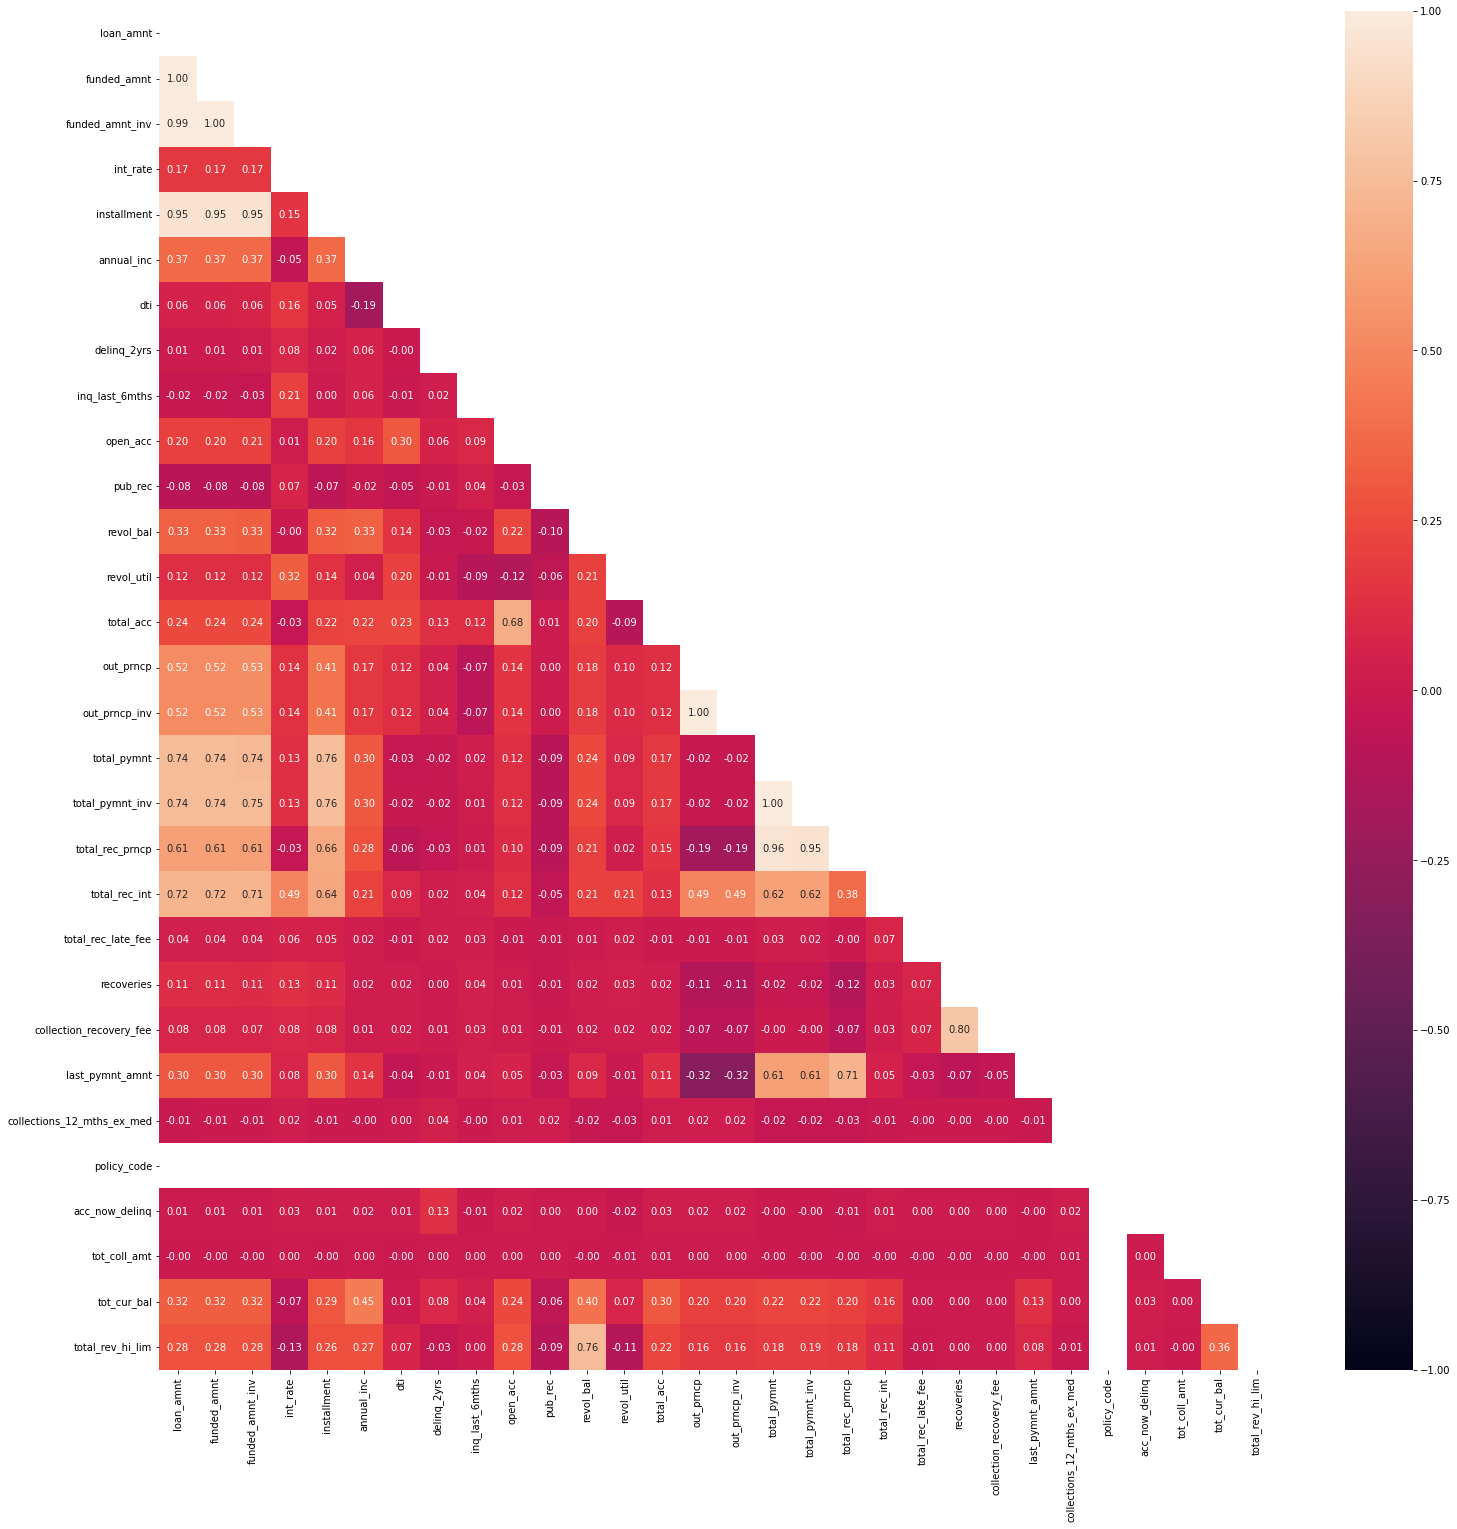

In [30]:
plt.figure(figsize=(25, 25))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, mask=mask, fmt='.2f')

In [31]:
#Cukup running sekali untuk drop untuk menghindari error code
#Alasan drop : Karena data redundan atau berkorelai tinggi dengan feature yang lain
#POlicy code karena hanya bernilai 1 variabel
drop_columns_3 = ['funded_amnt', 'funded_amnt_inv','installment','policy_code', 'out_prncp_inv', 'total_pymnt_inv','total_rec_prncp']
df.drop((drop_columns_3), axis=1, inplace=True)

In [32]:
drop_columns_4 = ['addr_state', 'earliest_cr_line', 'application_type']
df.drop((drop_columns_4), axis=1, inplace=True)

<AxesSubplot:>

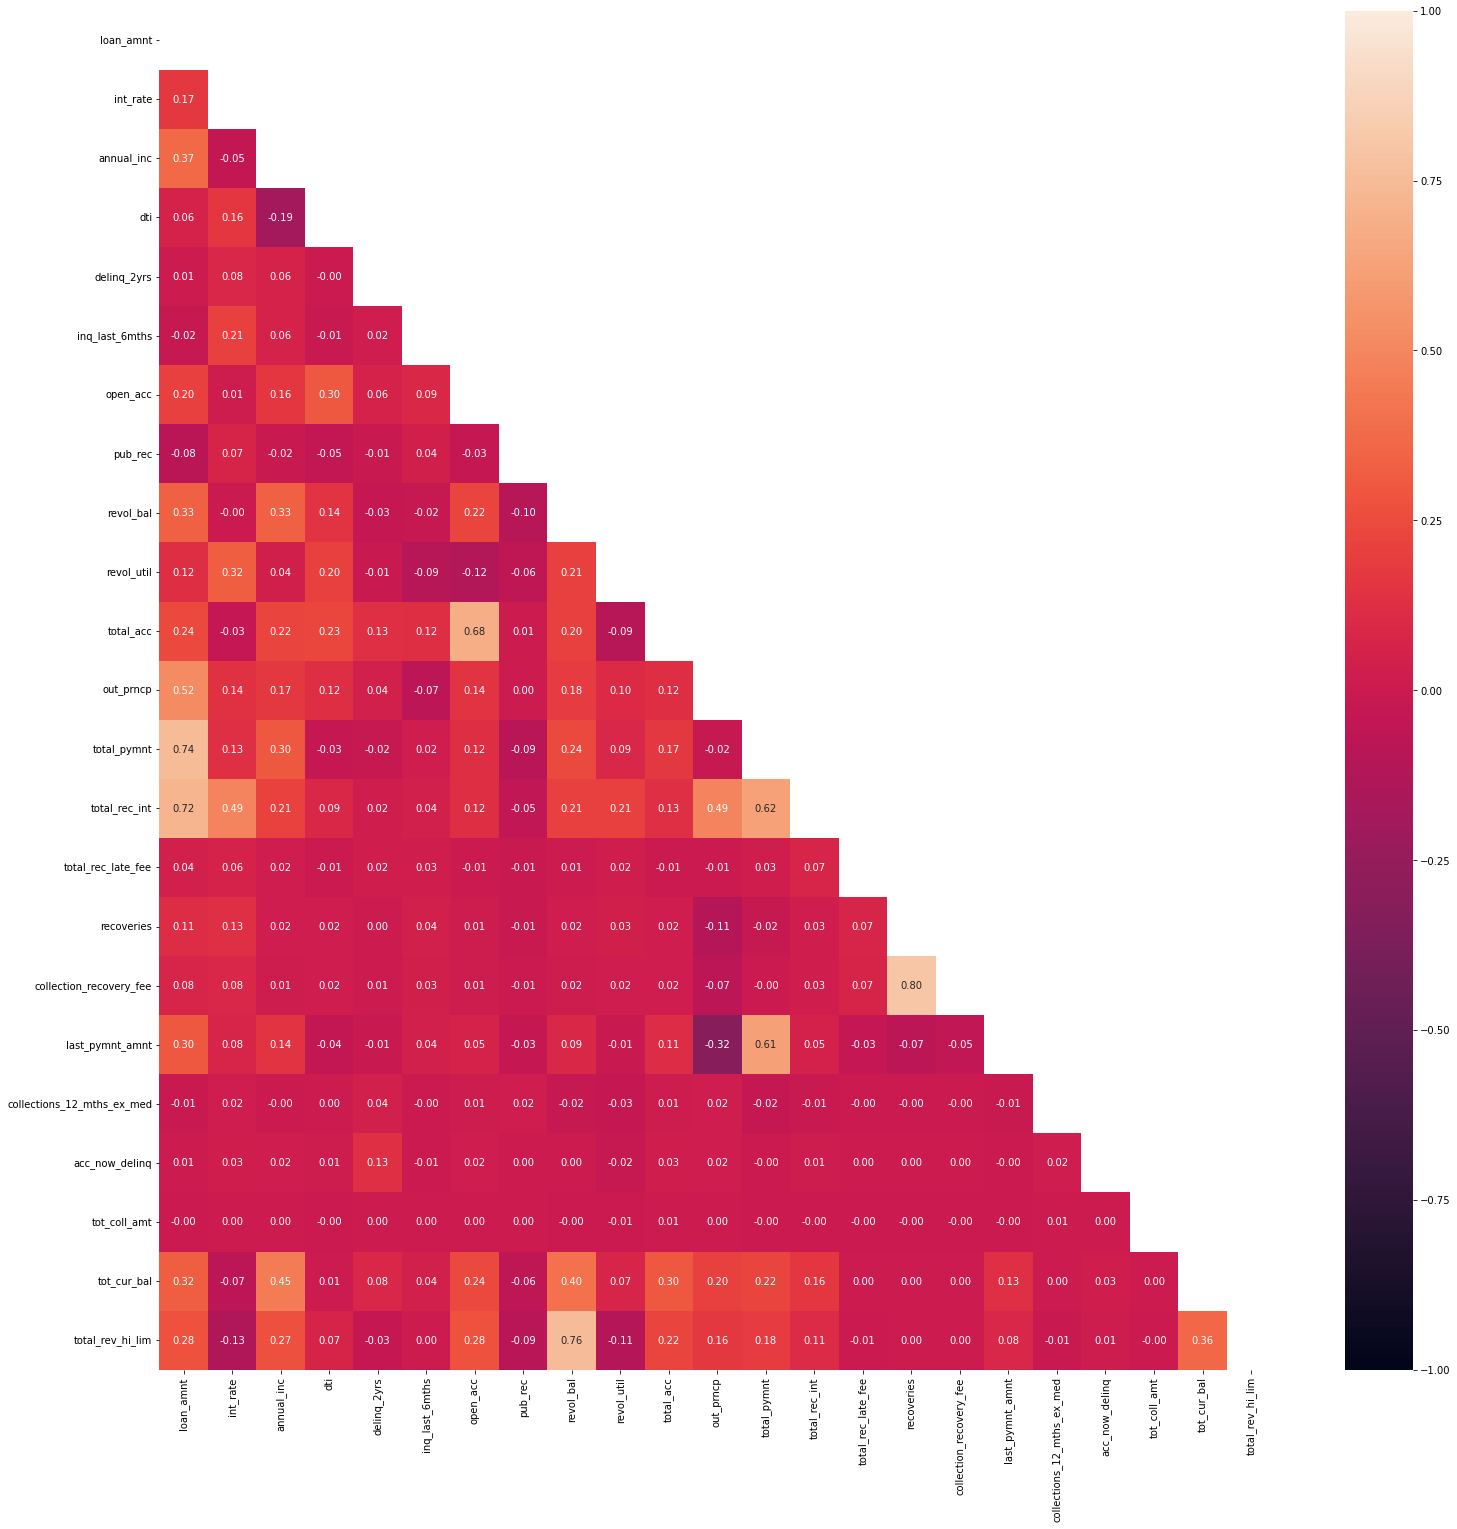

In [33]:
plt.figure(figsize=(25, 25))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, mask=mask, fmt='.2f')

## Multivariate Analysis

In [34]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,36 months,10.65,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,5861.071414,861.07,0.00,0.00,0.00,Jan-15,171.62,Feb-16,Jan-16,0.0,0.0,0.0,81539.0,22800.0
1,2500,60 months,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,1008.710000,435.17,0.00,117.08,1.11,Apr-13,119.66,Feb-16,Sep-13,0.0,0.0,0.0,81539.0,22800.0
2,2400,36 months,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,3003.653644,603.65,0.00,0.00,0.00,Jun-14,649.91,Feb-16,Jan-16,0.0,0.0,0.0,81539.0,22800.0
3,10000,36 months,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,12226.302210,2209.33,16.97,0.00,0.00,Jan-15,357.48,Feb-16,Jan-15,0.0,0.0,0.0,81539.0,22800.0
4,3000,60 months,12.69,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,3242.170000,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,0.0,0.0,81539.0,22800.0


# Feature Encoding & Feature Engineering

In [35]:
df_clean = df.copy()

In [36]:
df_clean.describe(exclude=np.number)

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d
count,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285
unique,2,7,35,11,6,3,91,9,2,14,2,98,100,103
top,36 months,B,B3,10+ years,MORTGAGE,Verified,Oct-14,Current,n,debt_consolidation,f,Jan-16,Feb-16,Jan-16
freq,337953,136929,31686,171057,235875,168055,38782,224226,466276,274195,303005,179996,435607,327741


#Treatmen pada data kategorik :
- term : Diubah dari data bulan menjadi tahun (mapping), rename menjadi term_year
- grade : mapping label encode
- subgrade : label encode
- emp_length : mapping label encode
- home_ownership : get_dummy (onehot)
- Verification Status : mapping label encode
- issue_d : extract month, label
- loan_status : TARGET PREDICTION, mapping label encode
- pymnt_plan : label encode
- purpose : get_dummy (onehot)
- initial_list_status : get_dummy (onehot)
- last_pymnt_d : extract month, label
- next_pymnt_d : extract month, label
- last_credit_pull_d : extract month, label

In [37]:
#df_clean.earliest_cr_line.unique()

In [38]:
df_clean.shape

(466285, 37)

In [39]:
df_clean['term'] = df_clean['term'].map(
    {' 36 months' : 3,
    ' 60 months' : 0.5})

In [40]:
df_clean['grade'] = df_clean['grade'].map(
    {'A' : 7,
    'B' : 6,
    'C' : 5,
    'D' : 4,
    'E' : 3,
    'F' : 2,
    'G' : 1})

In [41]:
df_clean.drop(['sub_grade'], axis=1, inplace=True)

In [42]:
df_clean['emp_length'] = df_clean['emp_length'].map(
    {'10+ years' : 10,
     '< 1 year': 0.5, #asumsi 6 bulan
     '1 year' : 1,
     '3 years' : 3,
     '8 years' : 8,
     '9 years' : 9,
     '4 years' : 4,
     '5 years' : 5, 
     '6 years' : 6, 
     '2 years' : 2,
     '7 years' : 7})

In [43]:
df_clean['verification_status'] = df_clean['verification_status'].map(
    {'Verified': 1, 
      'Source Verified':1, 
      'Not Verified':0})

In [44]:
df_clean['pymnt_plan'] = df_clean['pymnt_plan'].map(
    {'n':0,
     'y': 1})

In [ ]:
OneHot = pd.get_dummies(df_clean, columns=['home_ownership','purpose','initial_list_status' ], drop_first=True)
OneHot

In [65]:
OneHot.head(5)

,loan_amnt,term,int_rate,grade,emp_length,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
0,5000,3.0,10.65,6,10.0,24000.0,1,Dec-11,Fully Paid,0,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,0.0,5861.071414,861.07,0.00,0.00,0.00,Jan-15,171.62,Feb-16,Jan-16,0.0,0.0,0.0,81539.0,22800.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2500,0.5,15.27,5,0.5,30000.0,1,Dec-11,Charged Off,0,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,0.0,1008.710000,435.17,0.00,117.08,1.11,Apr-13,119.66,Feb-16,Sep-13,0.0,0.0,0.0,81539.0,22800.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400,3.0,15.96,5,10.0,12252.0,0,Dec-11,Fully Paid,0,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,0.0,3003.653644,603.65,0.00,0.00,0.00,Jun-14,649.91,Feb-16,Jan-16,0.0,0.0,0.0,81539.0,22800.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,10000,3.0,13.49,5,10.0,49200.0,1,Dec-11,Fully Paid,0,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,0.0,12226.302210,2209.33,16.97,0.00,0.00,Jan-15,357.48,Feb-16,Jan-15,0.0,0.0,0.0,81539.0,22800.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,3000,0.5,12.69,6,1.0,80000.0,1,Dec-11,Current,0,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,766.9,3242.170000,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,0.0,0.0,81539.0,22800.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [66]:
df_new = OneHot.copy()

In [67]:
#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder()

#enc_df = pd.DataFrame(enc.fit_transform(df_clean[['home_ownership','purpose','initial_list_status']]).toarray())
#enc_df

In [68]:
#Opsi pertama diubah menjadi datetime
#df_clean['issue_d'] = pd.to_datetime(df_clean['issue_d'])
#df_clean['last_pymnt_d'] = pd.to_datetime(df_clean['last_pymnt_d'])
#df_clean['next_pymnt_d'] = pd.to_datetime(df_clean['next_pymnt_d'])
#df_clean['last_credit_pull_d'] = pd.to_datetime(df_clean['last_credit_pull_d'])

In [69]:
#Opsi Kedua data di drop untuk mengurangi kompleksitas
drop_columns_5 = ['issue_d','last_pymnt_d','next_pymnt_d','last_credit_pull_d']
df_new.drop((drop_columns_5), axis=1, inplace=True)

In [70]:
df_new.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

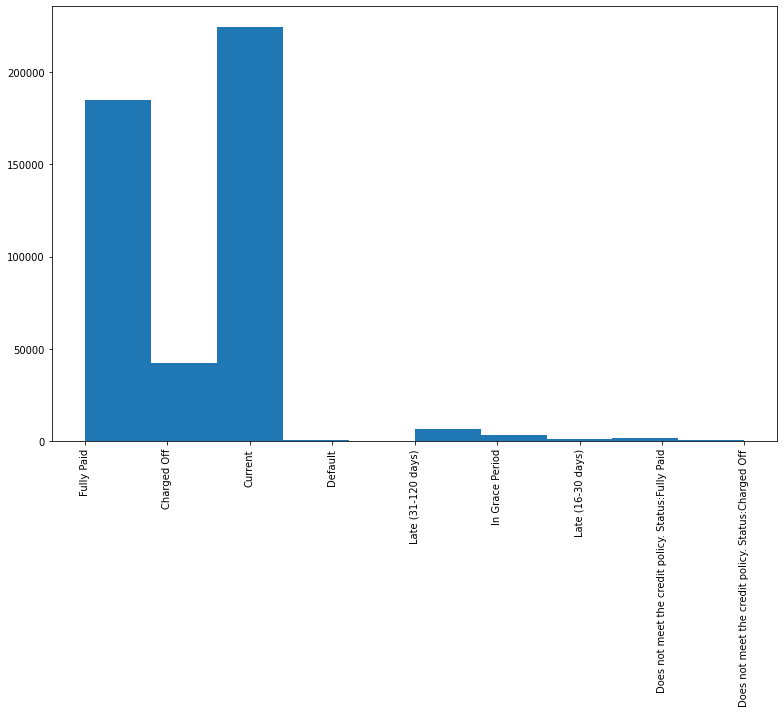

In [71]:
plt.figure(figsize=(13,8))
plt.hist(data = df_new, x='loan_status')
plt.xticks(rotation='vertical');

In [72]:
#Melihat masing masing jumlah status pinjaman saat ini
df_new.groupby('loan_status').agg({'loan_status':'count'})

,loan_status
loan_status,
Charged Off,42475
Current,224226
Default,832
Does not meet the credit policy. Status:Charged Off,761
Does not meet the credit policy. Status:Fully Paid,1988
Fully Paid,184739
In Grace Period,3146
Late (16-30 days),1218
Late (31-120 days),6900


In [73]:
#Menentukan apakah akan dipinjami untuk peminjaman selanjutnya
#Fully Paid = 1
#Charged Off = 1
#Current = 1
#Default =1
#===
#Late = 0
#In Grace Period = 0
#Late (16-30 days) = 0
#Late (31-120 days) = 0

In [74]:
df_new['loan_status'] = df_new['loan_status'].map({
    'Charged Off' : 1,
    'Current' : 1,
    'Default' : 1,
    'Fully Paid' : 1,
    'Does not meet the credit policy. Status:Charged Off' : 0,
    'Does not meet the credit policy. Status:Fully Paid' : 0,
    'In Grace Period' : 0,
    'Late (16-30 days)' : 0,
    'Late (31-120 days)' : 0
})

In [19]:
pd.set_option("display.max_columns", None) #Mengubah settingan default agar kolom terlihat semua tanpa ada ter skip '...'

In [20]:
df_new.head(5)

,loan_amnt,term,int_rate,grade,emp_length,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
0,5000,3.0,10.65,6,10.0,24000.0,1,1,0,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,0.0,5861.071414,861.07,0.00,0.00,0.00,171.62,0.0,0.0,0.0,81539.0,22800.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2500,0.5,15.27,5,0.5,30000.0,1,1,0,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,0.0,1008.710000,435.17,0.00,117.08,1.11,119.66,0.0,0.0,0.0,81539.0,22800.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400,3.0,15.96,5,10.0,12252.0,0,1,0,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,0.0,3003.653644,603.65,0.00,0.00,0.00,649.91,0.0,0.0,0.0,81539.0,22800.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,10000,3.0,13.49,5,10.0,49200.0,1,1,0,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,0.0,12226.302210,2209.33,16.97,0.00,0.00,357.48,0.0,0.0,0.0,81539.0,22800.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,3000,0.5,12.69,6,1.0,80000.0,1,1,0,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,766.9,3242.170000,1009.07,0.00,0.00,0.00,67.79,0.0,0.0,0.0,81539.0,22800.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


<AxesSubplot:xlabel='loan_status', ylabel='count'>

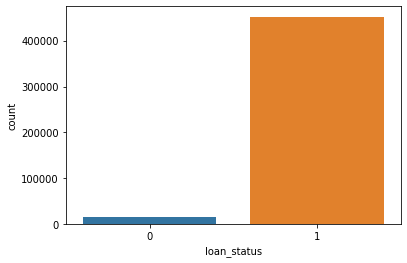

In [76]:
sns.countplot(x='loan_status', data=df_new)

In [77]:
df_new.to_csv('df_new_loan.csv')

# Jump To HERE to Run Model ()


In [1]:
import pandas as pd
df_new = pd.read_csv('df_new_loan.csv')

In [2]:
df_new.head(5)

,Unnamed: 0,loan_amnt,term,int_rate,grade,emp_length,annual_inc,verification_status,loan_status,pymnt_plan,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
0,0,5000,3.0,10.65,6,10.0,24000.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2500,0.5,15.27,5,0.5,30000.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2400,3.0,15.96,5,10.0,12252.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,3,10000,3.0,13.49,5,10.0,49200.0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
4,4,3000,0.5,12.69,6,1.0,80000.0,1,1,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
df_new.drop('Unnamed: 0', axis=1, inplace=True)


## Scalling

In [4]:
kolom_df = df_new.columns
df_new.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length', 'annual_inc',
       'verification_status', 'loan_status', 'pymnt_plan', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w'],
      dtype=

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
 
ss = StandardScaler()
mm = MinMaxScaler()


In [6]:
df_scaled = mm.fit_transform(df_new)

In [7]:
df_new_scaled = pd.DataFrame(df_scaled, columns=kolom_df)

In [8]:
df_new_scaled.head()

,loan_amnt,term,int_rate,grade,emp_length,annual_inc,verification_status,loan_status,pymnt_plan,dti,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
0,0.130435,1.0,0.253391,0.833333,1.000000,0.002948,1.0,1.0,0.0,0.691423,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.057971,0.0,0.477229,0.666667,0.000000,0.003748,1.0,1.0,0.0,0.025006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.055072,1.0,0.510659,0.666667,1.000000,0.001381,0.0,1.0,0.0,0.218055,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.275362,1.0,0.390988,0.666667,1.000000,0.006309,1.0,1.0,0.0,0.500125,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.072464,0.0,0.352229,0.833333,0.052632,0.010416,1.0,1.0,0.0,0.448612,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#pemisahan data
x_data = df_new_scaled[['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length', 'annual_inc',
       'verification_status', 'pymnt_plan', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w']]
y_data = df_new_scaled['loan_status']

In [10]:
#train test spltit
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2,
                                                random_state=42)

In [11]:
from collections import Counter
from imblearn.over_sampling import SMOTE
counter = Counter(y_train)
print('Before', counter)

#oversampling the train dataset using SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter_b = Counter(y_train_sm)
print('After', counter_b)

Before Counter({1.0: 361830, 0.0: 11198})
After Counter({1.0: 361830, 0.0: 361830})


# Modelling

## Random FOrest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [51]:
# Use the K Fold Split

In [23]:
from sklearn.model_selection import KFold

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
steps = [('over', SMOTE()), ('model', rf)]
pipeline = Pipeline(steps=steps)

In [ ]:
# evaluate pipeline
for scoring in["accuracy", "roc_auc"]:
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    scores = cross_val_score(pipeline, x_data, y_data, scoring=scoring, cv=cv, n_jobs=-1)
    print("Model", scoring, " mean=", scores.mean() , "stddev=", scores.std())

Model accuracy  mean= 0.9724217306296936 stddev= 0.00035049504764940237


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2,
                                                random_state=42)

In [16]:
for scoring in["accuracy", "roc_auc"]:
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    scores = cross_val_score(pipeline, x_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
    print("Model", scoring, " mean=", scores.mean() , "stddev=", scores.std())

Model accuracy  mean= 0.9723881306548253 stddev= 0.0005326226400483512
Model roc_auc  mean= 0.8606466938390732 stddev= 0.0034121990422038813


In [17]:
for scoring in["accuracy", "roc_auc"]:
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    scores = cross_val_score(pipeline, x_test, y_test, scoring=scoring, cv=cv, n_jobs=-1)
    print("Model", scoring, " mean=", scores.mean() , "stddev=", scores.std())

Model accuracy  mean= 0.9710977875303028 stddev= 0.0007085757412539157
Model roc_auc  mean= 0.8462421978745496 stddev= 0.007617078627741817


In [18]:
#10 Fold Cross Validation
for scoring in["accuracy", "roc_auc"]:
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
    scores = cross_val_score(pipeline, x_data, y_data, scoring=scoring, cv=cv, n_jobs=-1)
    print("Model", scoring, " mean=", scores.mean() , "stddev=", scores.std())

Model accuracy  mean= 0.9724324532912203 stddev= 0.0005000326679056984
Model roc_auc  mean= 0.8627820354487014 stddev= 0.0032024659122874563


Summary : 
- Model dengan RepeatedStratifiedKFold menghasilkan akurasi 97% pada data training dan juga 97% pada data test

## XGBoost

In [19]:
#from xgboost import XGBClassifier

In [20]:
#xgb = XGBClassifier()
#xgb.fit(x_train_sm, y_train_sm)

In [21]:
#start = time.time()
#y_pred_train_xgb = rf.predict(x_train_sm)
#end = time.time()
#rt_rf = 'Running time Random Forest Model', end-start
#print(rt_rf)

In [22]:
#print('XGB Classification Report\n', classification_report(y_train_sm, y_pred_train_xgb))

In [24]:
#start = time.time()
#y_pred_test_xgb = rf.predict(x_test)
#end = time.time()
#rt_rf_test = 'Running time Random Forest Model', end-start
#print(rt_rf_test)

In [50]:
print('XGB Classification Report\n', classification_report(y_test, y_pred_test_xgb))

XGB Classification Report
               precision    recall  f1-score   support

         0.0       0.59      0.23      0.33      2815
         1.0       0.98      1.00      0.99     90442

    accuracy                           0.97     93257
   macro avg       0.79      0.61      0.66     93257
weighted avg       0.96      0.97      0.97     93257



In [ ]:
#Overrfitting